In [31]:
import numpy as np
from scipy.special import eval_genlaguerre, genlaguerre
from scipy.integrate import quad
from scipy.special import factorial, factorial2

N = 25
mu = 1000
nu = 1

# Parte confrontata 
omega = 2*nu/mu

prefac = [np.sqrt(
            np.sqrt( 2* np.power(nu, 3)/np.pi) * \
            ( np.power(2, n+3)*factorial(n)/factorial2(2*n+1))) for n in range(N)]

def phi(r, n):
    return prefac[n]*np.exp( -nu* np.power(r, 2) ) * \
           eval_genlaguerre(n, 0.5, 2*nu*np.power(r, 2) )

def V(r):
    return -nu*omega*np.power(r,2) + \
            np.power(r, -1)*(7.39*np.exp(-1*3.11*r) - 3.22*np.exp(-1.555*r))

def integrand(r, i, j):
    ret = np.power(r, 2) * V(r) * phi(r, i)  * phi(r, j)
    return ret

def norm(r, i, j):
    ret = phi(r, i) * phi(r, j)
    return ret

In [3]:
H = np.zeros((N,N))
for i in range(H.shape[0]):
    for j in range(i, H.shape[1]):
        int_f, err = quad(integrand, 0, 100, args=(i, j), limit=100)

        H[i, j] = int_f
        H[j, i] = H[i, j]

        if i == j:
            H[i, j] += omega*(2*i + 1.5)

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(H)
idx = np.argmin(eigenvalues)
E = eigenvalues[idx]
c = eigenvectors[idx]

def WF(r):
    value = 0
    for n in range(N):
        value+=c[i]*phi(r, n)
    return value

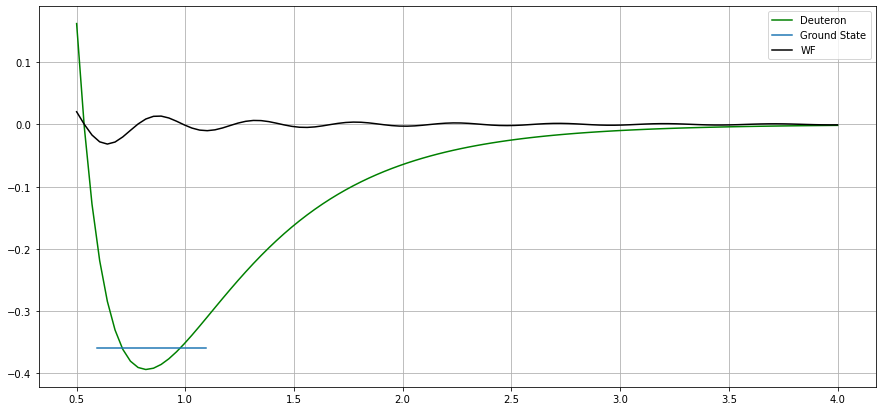

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

x = np.linspace(0.5, 4, num=100)
plt.plot(x, np.power(x, -1)*(7.39*np.exp(-1*3.11*x) - 3.22*np.exp(-1.555*x)),
                                             color='green', label="Deuteron");
    
wavefunction = [WF(r) for r in x]
plt.axhline(E, 0.07, 0.2, label="Ground State")
plt.plot(x, wavefunction, color='black', label="WF");
plt.legend()
plt.grid();

In [45]:
def integrand_V(r):
    return (WF(r))**2 * (7.39*np.exp(-1*3.11*r) - 3.22*np.exp(-1.555*r)) * r


matrixV = 4*np.pi*137*quad(integrand_V, 0, 1000, limit=100)[0]
matrixV

41.650905685688016

In [44]:
def integrand_V2(r):
    return (WF(r))**2 * ((7.39*np.exp(-1*3.11*r) - 3.22*np.exp(-1.555*r)))**2


matrixV2 = 4*np.pi*137**2 * quad(integrand_V2, 0, 1000, limit=100)[0]
matrixV2

259999.99785831585

(0.0016247523007559366, 1.4031157703103887e-08)

In [85]:
def matrixFF(r, q=2.3):
    return (WF(r))**2 * np.sin(0.5*q*r)*r
    
q = 2.3
matrixFF =  8*np.pi/q * quad(matrixFF, 0, 100, args=(q),limit=100)[0]
print(matrixFF)

def S(q, omega):
    hc = 137
    h=137
    m = 939
    m0 = 1-(matrixFF)**2
    m1 = h/m * q**2/4 +1-m0-E+E*m0
    m2 = matrixV2 + 2*(1+E)*matrixV*(h*q**2/(4*m))**2 + h*q**2/(m*2)*(1+2*E) + m*(1-E**2) + E**2 +1
    lambda1 = m1 / m0
    lambda2 = m2/m0 - (m1/m0)**2
    
    #print(m0, lambda1, lambda2)
    
    return m0/(2*np.pi*lambda2) * \
                np.exp( -1*(omega+lambda1)**2 / (2*lambda2)) * \
                (np.exp(2*lambda1*omega/lambda2)-1)

0.01775412136333205


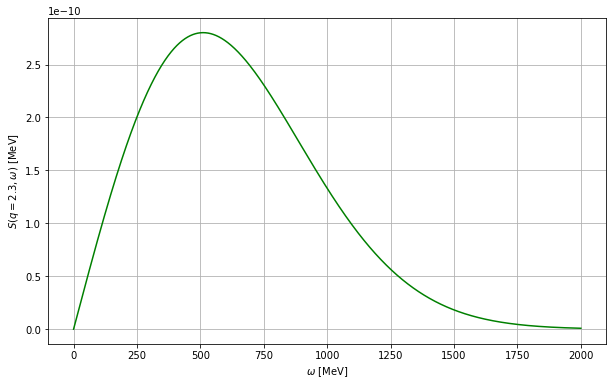

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

x = np.linspace(0, 2000, num=5000)

y = [S(2.3, omega) for omega in x]
plt.plot(x, y, color='green', label="Structure Function");
    
plt.xlabel(r"$\omega$ [MeV]")
plt.ylabel(r"$S(q=2.3, \omega)$ [MeV]")
plt.grid();